In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import datetime

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data into DataFrames
files = ['../data/processed/data_clean_Thang_Kaar_Baen_4185.csv',
         '../data/processed/data_clean_Thang_Kaar_Dorje_4014.csv']

dfs = []
for f in files:
    dfs.append(pd.read_csv(f, index_col='EventID'))

In [5]:
from pandas.tools.plotting import scatter_matrix

## Cross-correlation
Let's see how our variables are distributed, and how they correlate with one another.

### Correlation matrices

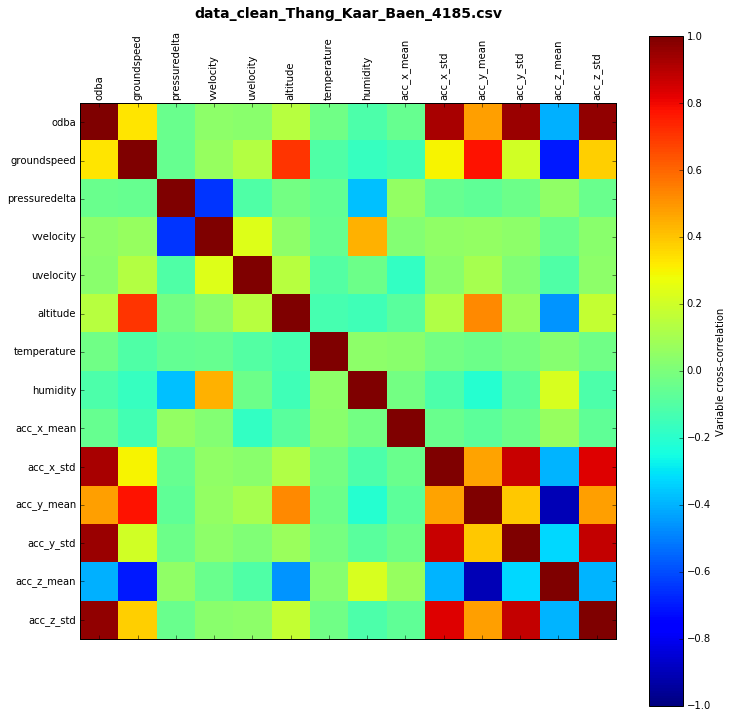

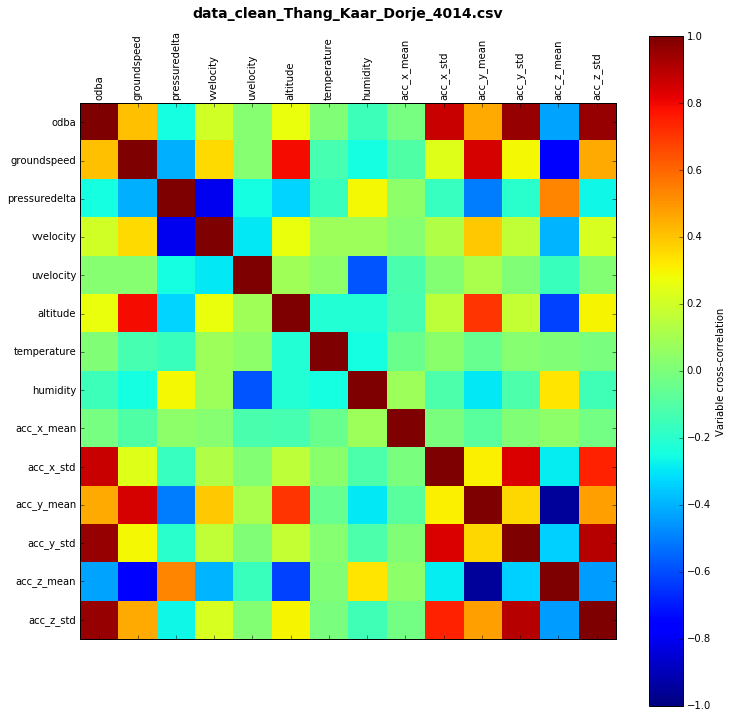

In [6]:
for (idx, df) in enumerate(dfs):
    correlations = df.corr()  # cross-correlation matrix
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax, label='Variable cross-correlation')
    ticks = np.arange(0,len(correlations),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(correlations.index, rotation=90)
    ax.set_yticklabels(correlations.index)
    ax.set_title(files[idx].split('/')[-1], {'fontsize': 14, 'fontweight' : 'bold'}, y=1.15)
    plt.show()

### Scatter matrices

##### First, non-acceleration variables (and ODBA)

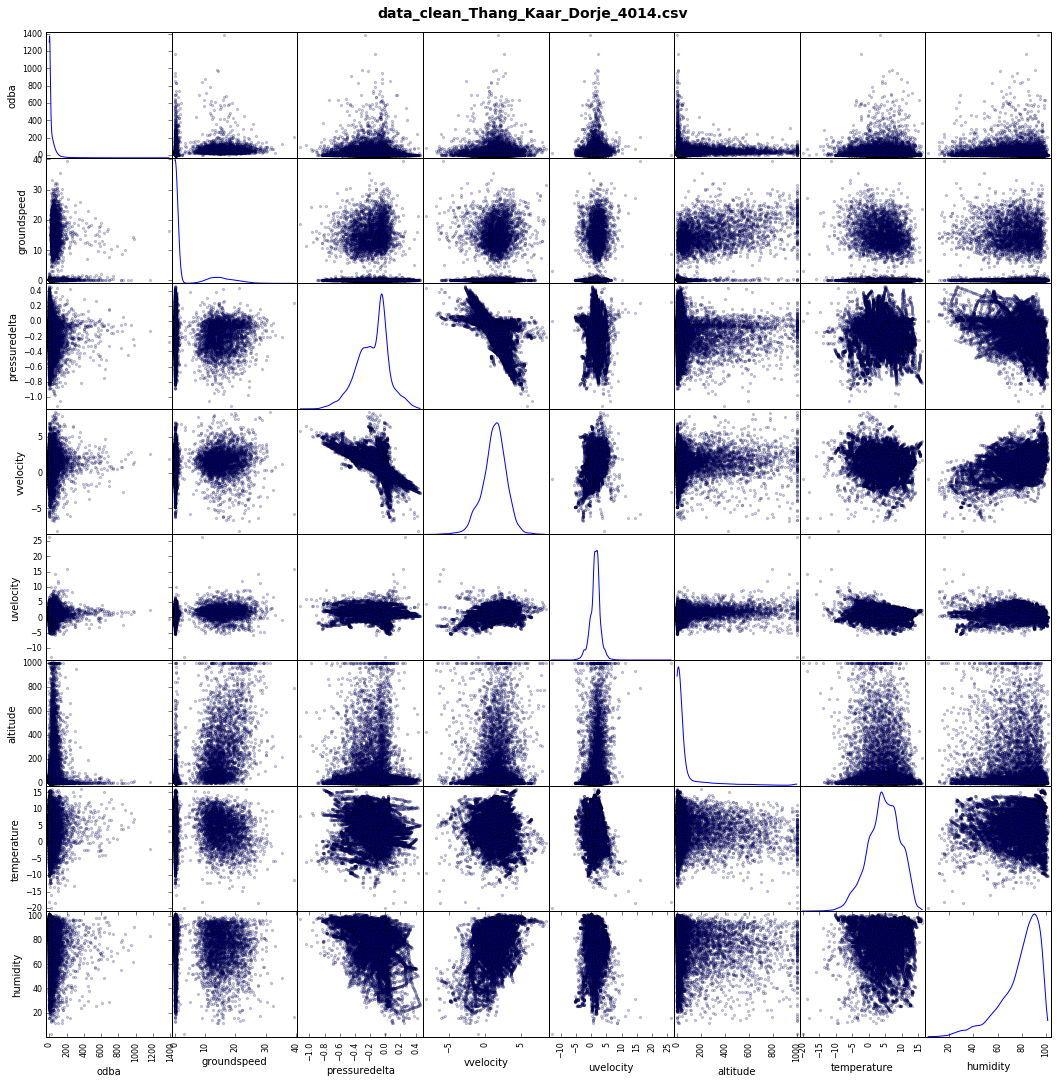

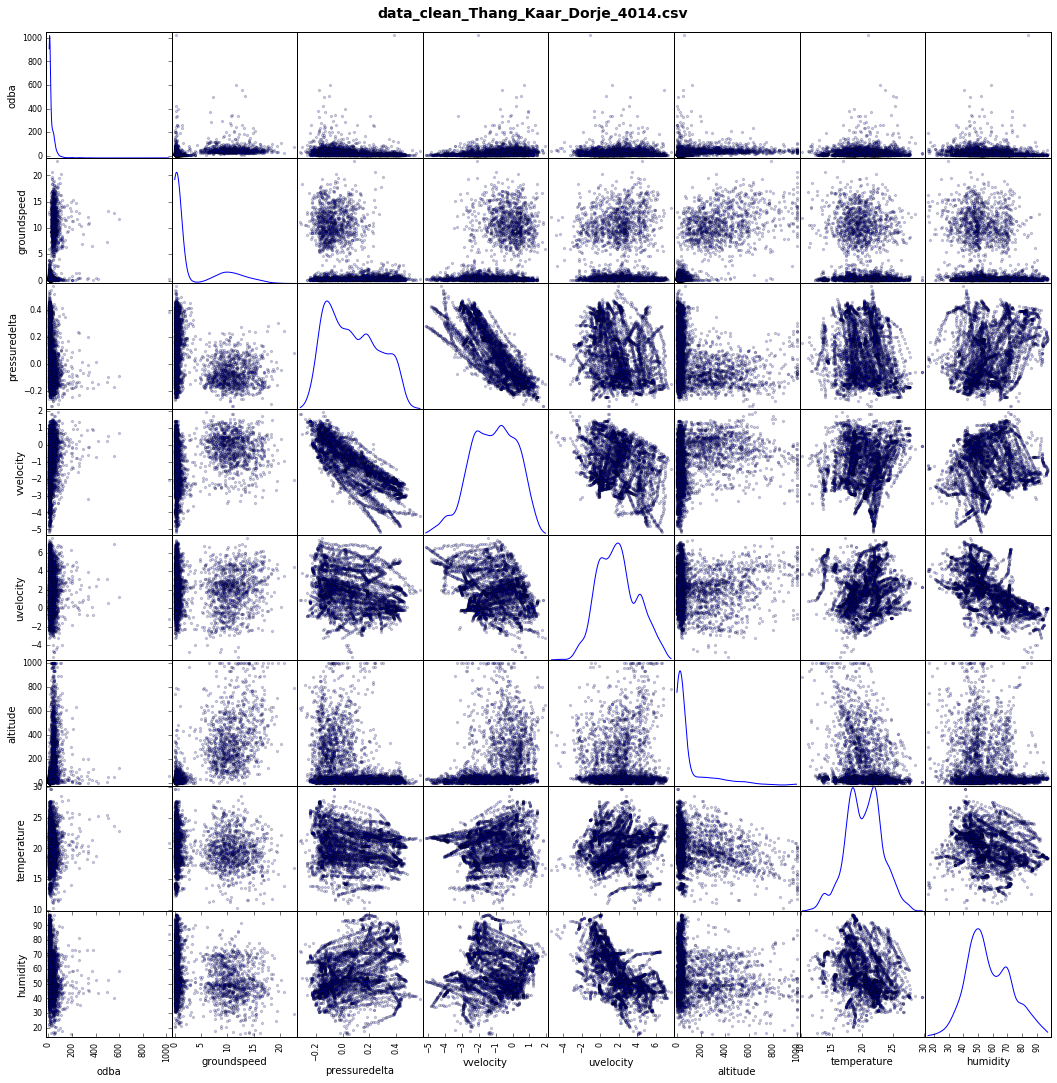

In [7]:
for (ifx, df) in enumerate(dfs):
    scatter_matrix(df[[col for col in df.columns if not col.startswith('acc')]],
                   alpha=0.2, figsize=(18,18), diagonal='kde');
    plt.suptitle(files[idx].split('/')[-1], fontsize=14, fontweight='bold', y=0.92);

##### Then, acceleration variables only

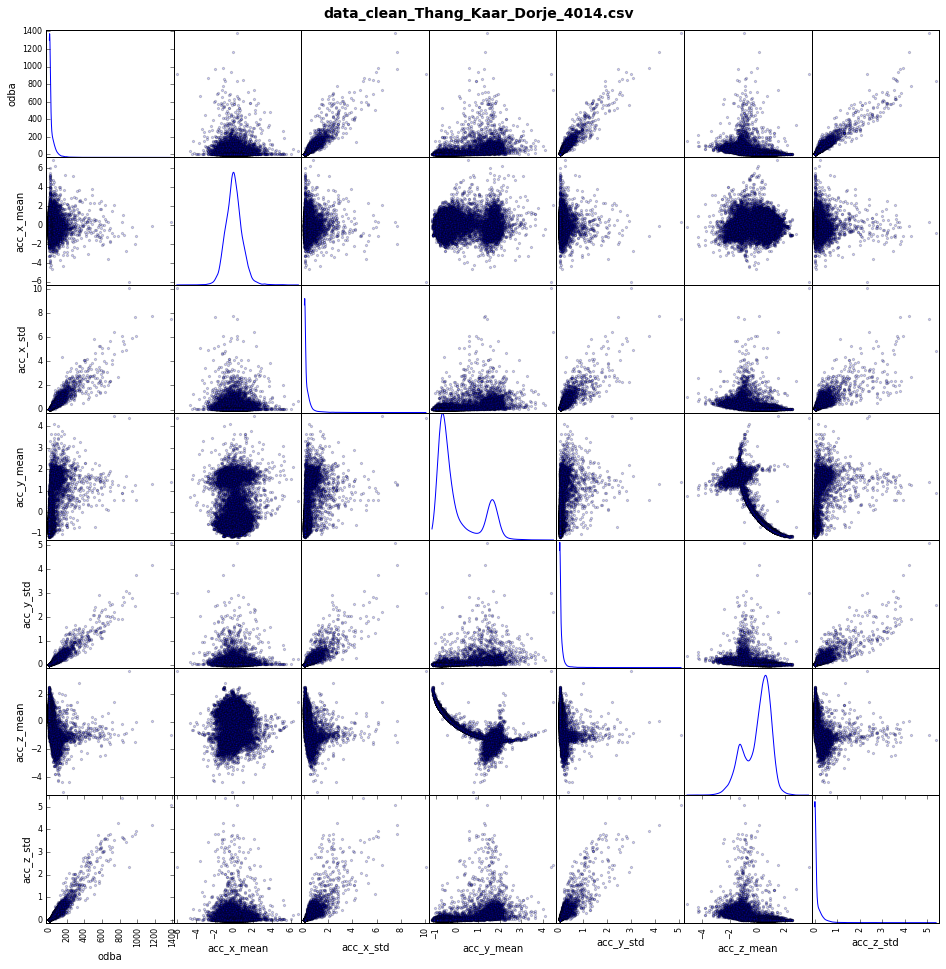

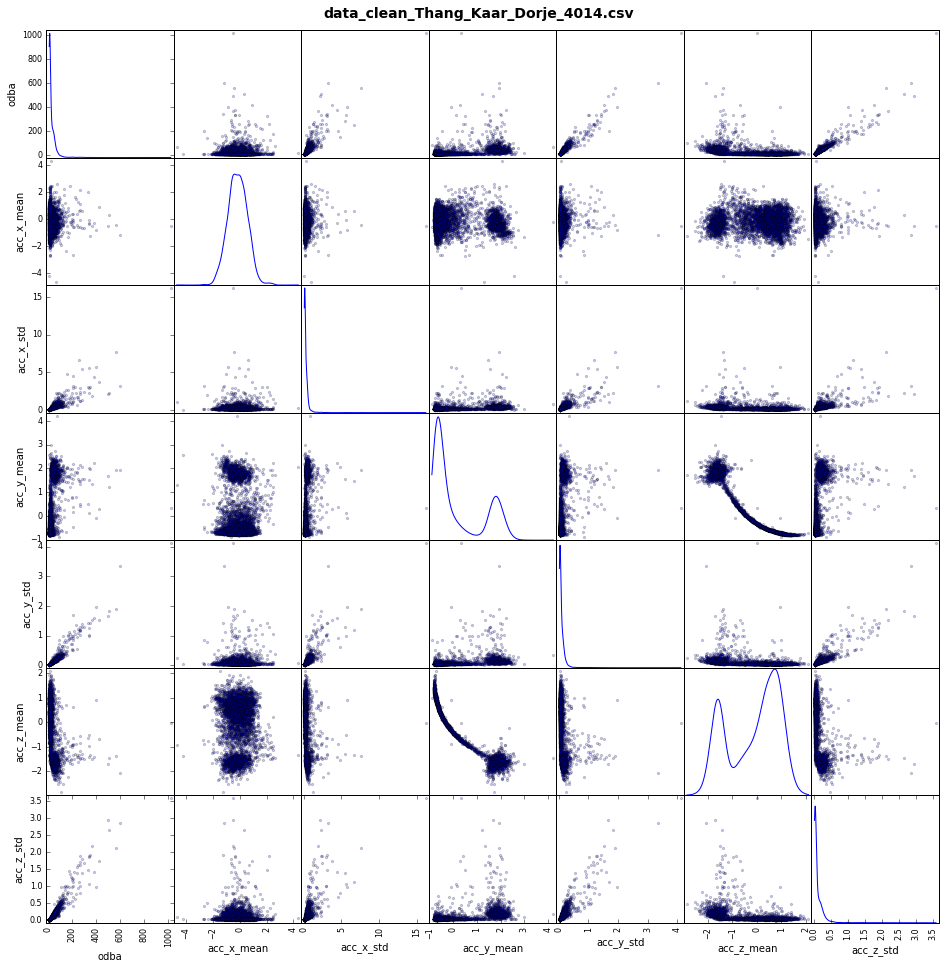

In [9]:
for (ifx, df) in enumerate(dfs):
    scatter_matrix(df[[col for col in df.columns if col.startswith('acc') or col=='odba']],
                   alpha=0.2, figsize=(16,16), diagonal='kde');
    plt.suptitle(files[idx].split('/')[-1], fontsize=14, fontweight='bold', y=0.92);